In [35]:
#Leemos el Notebook de Utils
#We read the Utils Notebook
%run Utils.ipynb
plt.style.use('fivethirtyeight')
import collections, functools, operator

In [36]:
path = "C:\\Users\\manub\\DATA\\00-EXTERNO\\MANU\\PHD\\WALKNET\\"

In [37]:
edges = path+"\\MADRID\RT_SAMPLE.shp"
nodes = path+"\\MADRID\\RT_SAMPLE_NODES.shp"

In [38]:
edges = gpd.read_file(edges)
nodes = gpd.read_file(nodes)

In [39]:
def remove_z_line(data_z):
    for i,row in tqdm(data_z.iterrows()):
        a = [coordinate[:2] for coordinate in list(row['geometry'].coords)]
        data_z.at[i,'geometry'] = LineString(a)
    return data_z
def remove_z_point(data_z):
    for i,row in tqdm(data_z.iterrows()):
        #print(row['geometry'].coords[0][:2])
        data_z.at[i,'geometry'] = Point(row['geometry'].coords[0][:2])
    return data_z

In [40]:
edges = remove_z_line(edges)
nodes = remove_z_point(nodes)

In [41]:
nodes['ID'] = nodes.index
edges['ID'] = edges.index

In [42]:
gdf_nodes = nodes
gdf_edges = edges

In [43]:
edges.to_file(path+"\\MADRID\\sample_edges_loaded_flat.shp",driver='ESRI Shapefile')
edges = path+"\\MADRID\\sample_edges_loaded_flat.shp"
nodes.to_file(path+"\\MADRID\\sample_nodes_loaded_flat.shp",driver='ESRI Shapefile')
nodes = path+"\\MADRID\\sample_nodes_loaded_flat.shp"

In [44]:
G = create_undirected_from_shp(edges,nodes,'ID','ID','LONG','MADRID')


Generating Graph...

Loading Edge attributes




Loading Node attributes




Graph Ready


In [45]:
sub_graphs = [G.subgraph(c) for c in nx.connected_components(G)]

In [46]:
G = sub_graphs[3]

In [47]:
cc = nx.closeness_centrality(G, u=None, distance='LONG')

In [48]:
bc = nx.betweenness_centrality(G, k=None, normalized=True, weight='LONG', endpoints=False, seed=None)

In [49]:
kzc = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='LONG')

In [50]:
cfcc = nx.current_flow_closeness_centrality(G, weight='LONG', solver='lu')

In [54]:
cfbcs = nx.current_flow_betweenness_centrality_subset(G,[1117],[645], normalized=True , weight='LONG', solver='full')

In [55]:
cfbc = nx.current_flow_betweenness_centrality(G, normalized=True, weight='LONG', solver='full')

In [56]:
comc = nx.communicability_betweenness_centrality(G, normalized=True)

In [57]:
ldcn = nx.load_centrality(G, v=None, cutoff=None, normalized=True, weight='LONG')

In [58]:
hmc = nx.harmonic_centrality(G, nbunch=None, distance=None)

In [59]:
gdf_nodes['cc'] = gdf_nodes['ID'].map(cc)
gdf_nodes['bc'] = gdf_nodes['ID'].map(bc)
gdf_nodes['kzc'] = gdf_nodes['ID'].map(kzc)
gdf_nodes['cfcc'] = gdf_nodes['ID'].map(cfcc)
gdf_nodes['cfbc'] = gdf_nodes['ID'].map(cfbc)
gdf_nodes['cfbcs'] = gdf_nodes['ID'].map(cfbcs)
gdf_nodes['comc'] = gdf_nodes['ID'].map(comc)
gdf_nodes['ldcn'] = gdf_nodes['ID'].map(ldcn)
gdf_nodes['hmc'] = gdf_nodes['ID'].map(hmc)

In [60]:
d_edges = {(e[0],e[1]):e[2]['ID'] for e in list(G.edges(data=True))}

In [61]:
ebc = nx.edge_betweenness_centrality(G, k=None, normalized=True, weight='LONG', seed=None)

In [62]:
ecfbc = nx.edge_current_flow_betweenness_centrality(G, normalized=True, weight='LONG', solver='cg')

In [63]:
ecfbcs = nx.edge_current_flow_betweenness_centrality_subset(G, [1117],[645], normalized=True, weight='LONG', solver='lu')

In [64]:
ecfbc = {d_edges[k]:v for k,v in ecfbc.items() if k in d_edges.keys()}
ebc = {d_edges[k]:v for k,v in ebc.items() if k in d_edges.keys()}
ecfbcs = {d_edges[k]:v for k,v in ecfbcs.items() if k in d_edges.keys()}

In [65]:
gdf_edges['ebc'] = gdf_edges['ID'].map(ebc)
gdf_edges['ecfbc'] = gdf_edges['ID'].map(ecfbc)
gdf_edges['ecfbcs'] = gdf_edges['ID'].map(ecfbcs)

In [66]:
ecfbcs

{94: 1.2494827994184377e-07,
 93: 2.6484118642538476e-07,
 95: 5.73033820861285e-08,
 1221: 1.2455350023795872e-07,
 1919: 1.332454008109737e-07,
 151: 0.0,
 570: 4.248243854501884e-07,
 571: 4.3809773227642657e-07,
 1116: 1.1835655742140156e-07,
 1547: 4.22456370931234e-08,
 1545: 7.611092032827294e-08,
 1415: 1.2901219516391497e-08,
 1115: 2.2257181037777578e-07,
 1999: 9.61548694867899e-07,
 158: 2.4224670231764634e-07,
 1456: 2.7760706924084955e-07,
 157: 4.6451461822916756e-07,
 164: 3.661450046916077e-07,
 1374: 1.878543544246088e-07,
 159: 9.363856022199109e-07,
 591: 8.29965313710246e-08,
 163: 3.2524323368866314e-07,
 1603: 1.4617311596131706e-07,
 2031: 5.0987169298892526e-08,
 1124: 8.744321193361652e-07,
 1125: 1.0119737957470798e-06,
 1912: 7.594201872483606e-08,
 1915: 4.619118673184396e-07,
 2077: 1.2350032268352188e-07,
 2087: 1.4365253768647762e-07,
 502: 1.3354851087006194e-07,
 532: 8.204658146342221e-09,
 161: 8.615449332235012e-07,
 1622: 1.1840524437802386e-07,
 1

In [67]:
gdf_nodes = gdf_nodes.loc[gdf_nodes['BARRIO']=='EMBAJADORE']

In [68]:
gdf_edges = gdf_edges.loc[gdf_edges['BARRIO']=='EMBAJADORE']

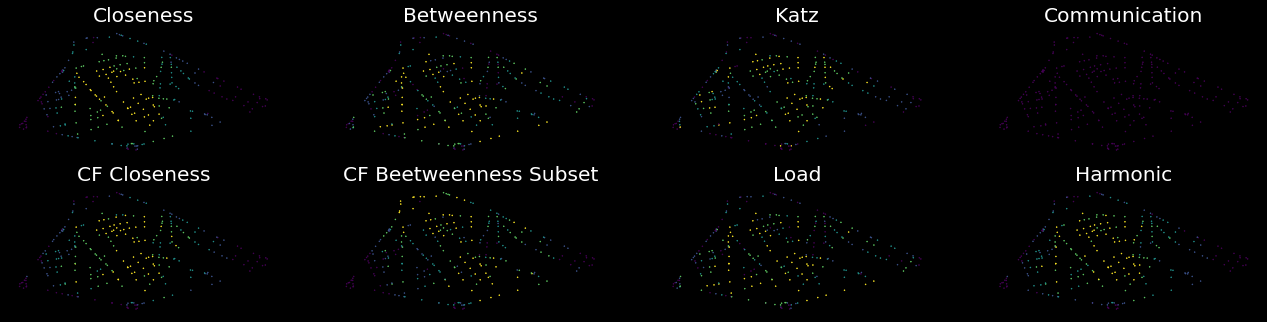

In [72]:
plt.style.use('dark_background')
fig,ax = plt.subplots(nrows = 2 ,ncols = 4,figsize = (20,5))
gdf_nodes.plot(ax=ax[0][0],column='cc',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[0][1],column='bc',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[0][2],column='kzc',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[0][3],column='comc',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[1][0],column='cfcc',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[1][1],column='cfbcs',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[1][2],column='ldcn',markersize=1,scheme='quantiles')
gdf_nodes.plot(ax=ax[1][3],column='hmc',markersize=1,scheme='quantiles')

ax[0, 0].axis('off')
ax[0, 0].set_title('Closeness')
ax[0, 1].axis('off')
ax[0, 1].set_title('Betweenness')
ax[0, 2].axis('off')
ax[0, 2].set_title('Katz')
ax[0, 3].axis('off')
ax[0, 3].set_title('Communication')
ax[1, 0].axis('off')
ax[1, 0].set_title('CF Closeness')
ax[1, 1].axis('off')
ax[1, 1].set_title('CF Beetweenness Subset')
ax[1, 2].axis('off')
ax[1, 2].set_title('Load')
ax[1, 3].axis('off')
ax[1, 3].set_title('Harmonic')

#plt.savefig(path+"Salamanca_nodes.jpg",dpi=300)
plt.show()


Text(0.5, 1.0, 'Current Flow Betweenness Subset')

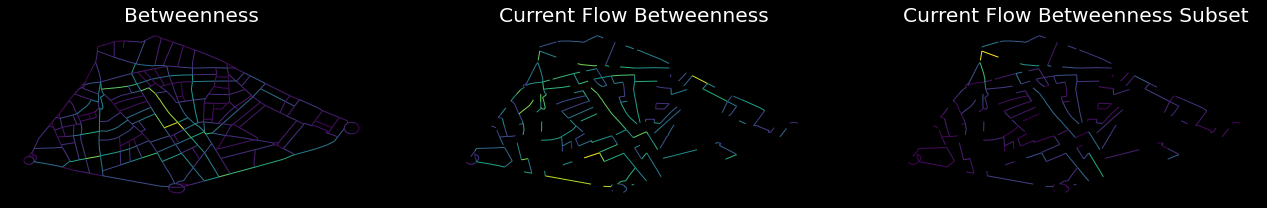

In [70]:
fig,ax = plt.subplots(nrows = 1 ,ncols = 3,figsize = (20,5))
gdf_edges.plot(ax=ax[0],column='ebc',linewidth=1)
gdf_edges.plot(ax=ax[1],column='ecfbc',linewidth=1)
gdf_edges.plot(ax=ax[2],column='ecfbcs',linewidth=1)


ax[0].axis('off')
ax[0].set_title('Betweenness')
ax[1].axis('off')
ax[1].set_title('Current Flow Betweenness')
ax[2].axis('off')
ax[2].set_title('Current Flow Betweenness Subset')
#plt.savefig(path+"Salamanca.jpg",dpi=300)


In [71]:
gdf_nodes.to_file(path+"try_nodes.gpkg",driver='GPKG')
gdf_edges.to_file(path+"try_edges.gpkg",driver='GPKG')